# Plotter 2.0
---
- Read weather.csv
- Loop through each station
- Plot temperature
-- All stations together
-- Each station seperately
- Plot wind

In [428]:
import os
from datetime import date, datetime, timedelta
import pandas as pd
import seaborn as sns
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from PIL import Image
import numpy as np

## Import data
---

In [429]:
data_path = './data/weather_clean.csv'

# If data exists, load it
# ~~~~~~~~~~~~~~~~~~~~~~~
if os.path.exists(data_path):
    weather_data = pd.read_csv(data_path)
    print(weather_data.head())
else:
    print("No historical data exists")

         Date     Station  Pressure  Height  Temp  DewPoint  \
0  2020-01-01  Quillayute       700  2969.0  -0.9      -0.9   
1  2020-01-01  Quillayute       850  1393.0   6.2       6.2   
2  2020-01-01      Vernon       700  2880.0  -5.5      -7.0   
3  2020-01-01      Vernon       850  1357.0  -3.9      -5.8   
4  2020-01-01  Port Hardy       700  2856.0  -4.3      -5.8   

   Relative_Humidity  Mean_Mixed_Layer  Wind_Direction  Wind_Speed  \
0              100.0              5.14           255.0     100.008   
1              100.0              7.04           260.0      81.488   
2               89.0              3.25           260.0      94.452   
3               87.0              2.93           170.0      18.520   
4               89.0              3.56           250.0      87.044   

   Potential_Temp  Equivalent_Potential_Temp  Virtual_Potential_Temp  
0           301.5                      317.2                   302.4  
1           292.6                      313.1              

## Define Plot Attributes for Each Location
---

In [432]:
locations = [{
    'name': "Vernon",
    'palette_order': [2, 4], # green
    'save_name': "vernon",
    'data': weather_data[weather_data['Station'] == "Vernon"]
},
{
    'name': "Port Hardy",
    'palette_order': [4, 6], # red
    'save_name': "porthardy",
    'data': weather_data[weather_data['Station'] == "Port Hardy"]
},
{
    'name': "Quillayute",
    'palette_order': [0, 2], # blue
    'save_name': "quillayute",
    'data': weather_data[weather_data['Station'] == "Quillayute"]
}]

date = datetime.today().date()
days = [3, 5, 10, 30, 90, 180]
plots = [locations[0], locations[1], locations [2]]

In [433]:
locations[0]['data'][locations[0]['data']['Date'] < '2023-06-28']

Date Station  Pressure  Height  Temp  DewPoint  Relative_Humidity  \
2     2020-01-01  Vernon       700  2880.0  -5.5      -7.0               89.0   
3     2020-01-01  Vernon       850  1357.0  -3.9      -5.8               87.0   
8     2020-01-02  Vernon       700  2882.0  -9.5     -12.3               80.0   
9     2020-01-02  Vernon       850  1351.0   2.2      -4.8               60.0   
18    2020-01-04  Vernon       700  2937.0  -5.7     -10.7               68.0   
...          ...     ...       ...     ...   ...       ...                ...   
7413  2023-06-25  Vernon       700  3122.0  -0.1      -0.9               94.0   
7415  2023-06-26  Vernon       850  1529.0  14.4       7.4               63.0   
7419  2023-06-26  Vernon       700  3131.0   1.8      -1.9               76.0   
7422  2023-06-27  Vernon       700  3124.0   4.4      -3.6               56.0   
7423  2023-06-27  Vernon       850  1501.0  18.6       4.6               40.0   

      Mean_Mixed_Layer  Wind_Direction  Wind_Speed  Potential_Temp  \
2                 3.25           260.0      94.452           296.4   
3                 2.93           170.0      18.520           282.1   
8                 2.14           305.0      31.484           291.9   
9                 3.16           245.0      33.336           288.4   
18                2.43           235.0      87.044           296.1   
...                ...             ...         ...             ...   
7413              5.14           220.0      29.632           302.3   
7415              7.65           145.0       1.852           301.2   
7419              4.78           355.0       7.408           304.4   
7422              4.21             5.0       3.704           307.3   
7423              6.29           350.0      12.964           305.6   

      Equivalent_Potential_Temp  Virtual_Potential_Temp  
2                         306.3                   296.9  
3                         290.5                   282.6  
8                         298.5                   292.3  
9                         297.8                   289.0  
18                        303.7                   296.6  
...                         ...                     ...  
7413                      318.1                   303.3  
7415                      324.2                   302.6  
7419                      319.3                   305.3  
7422                      320.6                   308.1  
7423                      325.0                   306.8  

[2452 rows x 13 columns]

## Function to Truncate CMAP
---

In [434]:
# Function to truncate a colormap
# Can be used to remove white / black bookended values
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## Function to Plot Temps
---

In [435]:
def plot_temps(locations=[], date=datetime.today().date(), days=[], save_name=''):
    
    # Loop through each graph type to plot
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for d in days:
    
        # Set figure details
        # ~~~~~~~~~~~~~~~~~~
        plt.figure(figsize=(20,6))
        plt.xlim([0, d -1])
        plt.grid()
        plt.axhline(0, color='black')
        plt.xticks(rotation = 'vertical')
        if d > 30:
            plt.xticks(np.arange(0, d+1, 7.0))
        
        if len(locations) == 1:
            plt.title("{} Temperature °C - {} day".format(locations[0]['name'], d))
        else:
            plt.title("Temperature °C - {} day".format(d))

        palette = sns.color_palette("Paired", n_colors=6)
        palette_order = [1, 0, 3, 2, 5, 4]
        palette = [palette[idx] for idx in palette_order]
        hue_order = [850, 700]

        # Loop through each location and plot data on graph
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        for location in locations:
            
            # Create truncated data object with only correct date range
            # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            mask = (location['data']['Date'] > str(date - timedelta(days=d))) & (location['data']['Date'] <= str(date))
            plot_data = location['data'].loc[mask]
            
            # Add data for single location to graph
            # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            if not plot_data.empty:
                g = sns.lineplot(x='Date', y='Temp', hue='Pressure', data=plot_data, palette=palette[location['palette_order'][0]: location['palette_order'][1]], hue_order=hue_order)
            else:
                print('Empty dataframe - cannot plot')
                
            
        # Rename legend with detailed labels
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        l = plt.legend()
        labels = []
        for location in locations:
            for pressure in [700, 850]:
                labels.append('{} {}'.format(location['name'], pressure))

        # Re-order labels by desc pressure
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        if len(locations) == len(palette_order) / 2:
            labels = [labels[idx] for idx in palette_order]
        else:
            labels = ['850', '700']
        for x, label in enumerate(labels):
            l.get_texts()[x].set_text(label)

        # Generate Save Path
        # ~~~~~~~~~~~~~~~~~~
        if not save_name:
            save_name = '{}_temp'.format(locations[0]['name'].lower().replace(' ', ''))
            
        save_loc = "./figures/temp/{}".format(date)
            
        if not os.path.isdir(save_loc):
            os.makedirs(save_loc)
            
        # Save image as webp
        # ~~~~~~~~~~~~~~~~~~
        path = '{}/{}_{}d_{}'.format(save_loc, save_name, d, date)
        plt.savefig('{}.webp'.format(path), format='webp',dpi=150, bbox_inches="tight")  
    

## Function to Plot Wind
---

In [445]:
def plot_wind(location, date=datetime.today().date(), days=[]):
    
    # Define color map and truncate to apropriate range
    cmap = cm.viridis_r
    cmap = truncate_colormap(cmap, minval=0, maxval=0.9)
    
    # Loop through each graph type to plot
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for d in days:
        # Create truncated data object with only correct date range
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        mask = (location['data']['Date'] > str(date - timedelta(days=d))) & (location['data']['Date'] <= str(date))
        plot_data = location['data'].loc[mask]
        
        # Continue to next loop if df is empty
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        if plot_data.empty:
            print('Empty dataframe - cannot plot')
            continue
            
        # Populate speed and direction vars from DataFrame
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  
        wd = plot_data['Wind_Direction'].to_list()
        ws = plot_data['Wind_Speed'].to_list()
        
        
        # Plot wind rose for data set
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~
        ax = WindroseAxes.from_ax()
        #ax.contourf(wd, ws, bins=np.arange(0, 100, 10), cmap=cmap)
        ax.contourf(wd, ws, cmap=cmap)
        ax.set_legend()
                
        # Save figure
        plt.title("{} Wind - {} day".format(location['name'], d))
        plt.legend(title="Wind Speed (km/h)", loc=4, fontsize='small', fancybox=True)
        
        # Generate Save Path
        # ~~~~~~~~~~~~~~~~~~
        save_name = '{}_wind'.format(location['name'].lower().replace(' ', ''))
            
        save_loc = "./figures/wind/{}".format(date)
            
        if not os.path.isdir(save_loc):
            os.makedirs(save_loc)
        
        # Save image as webp
        # ~~~~~~~~~~~~~~~~~~
        path = '{}/{}_{}d_{}'.format(save_loc, save_name, d, date)
        plt.savefig('{}.webp'.format(path), format='webp',dpi=150)

## Plot ALL Temps
---
Plot all a range of temp graphs with ALL locations on a single graph

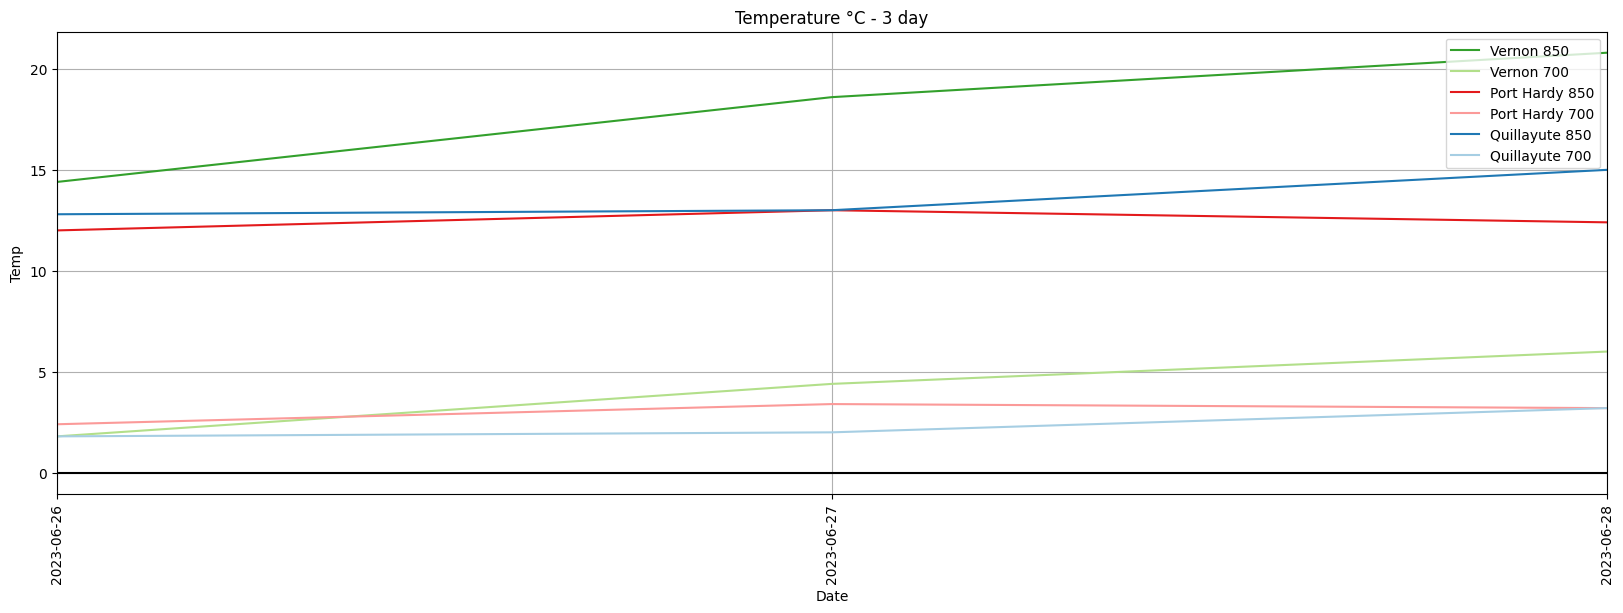

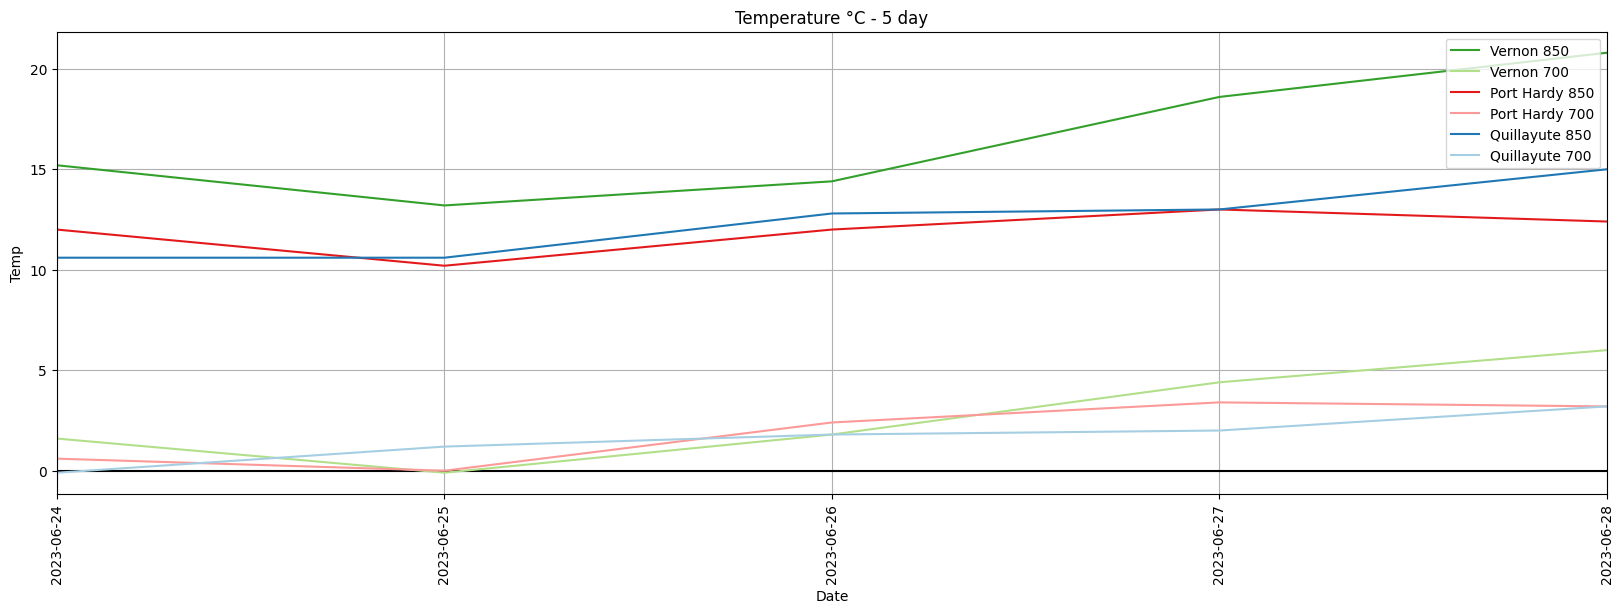

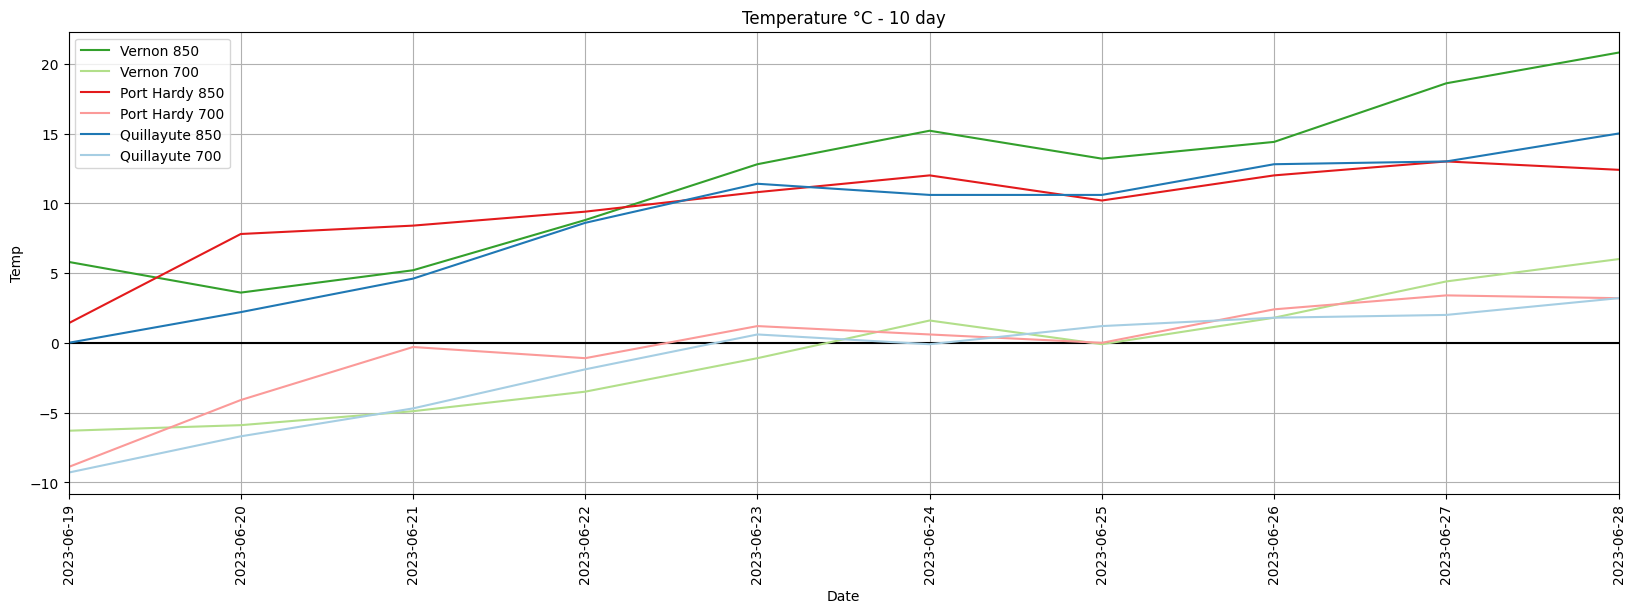

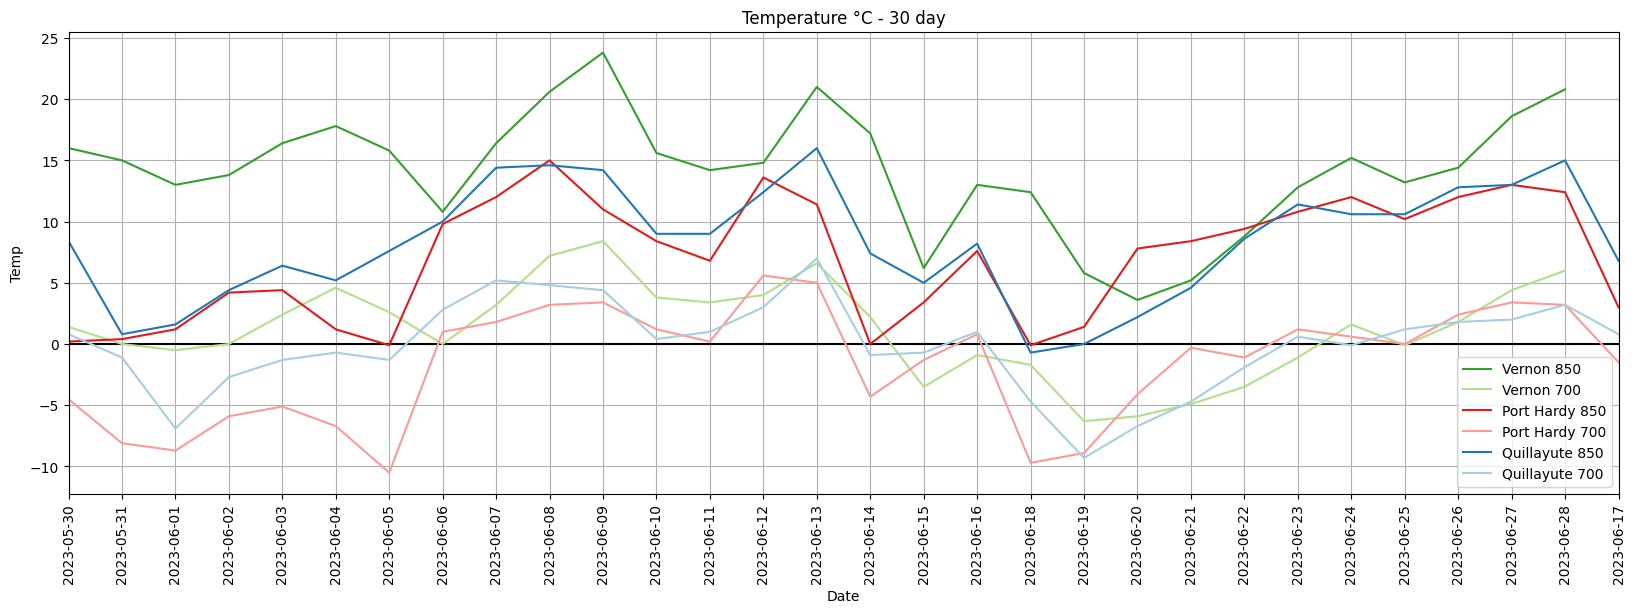

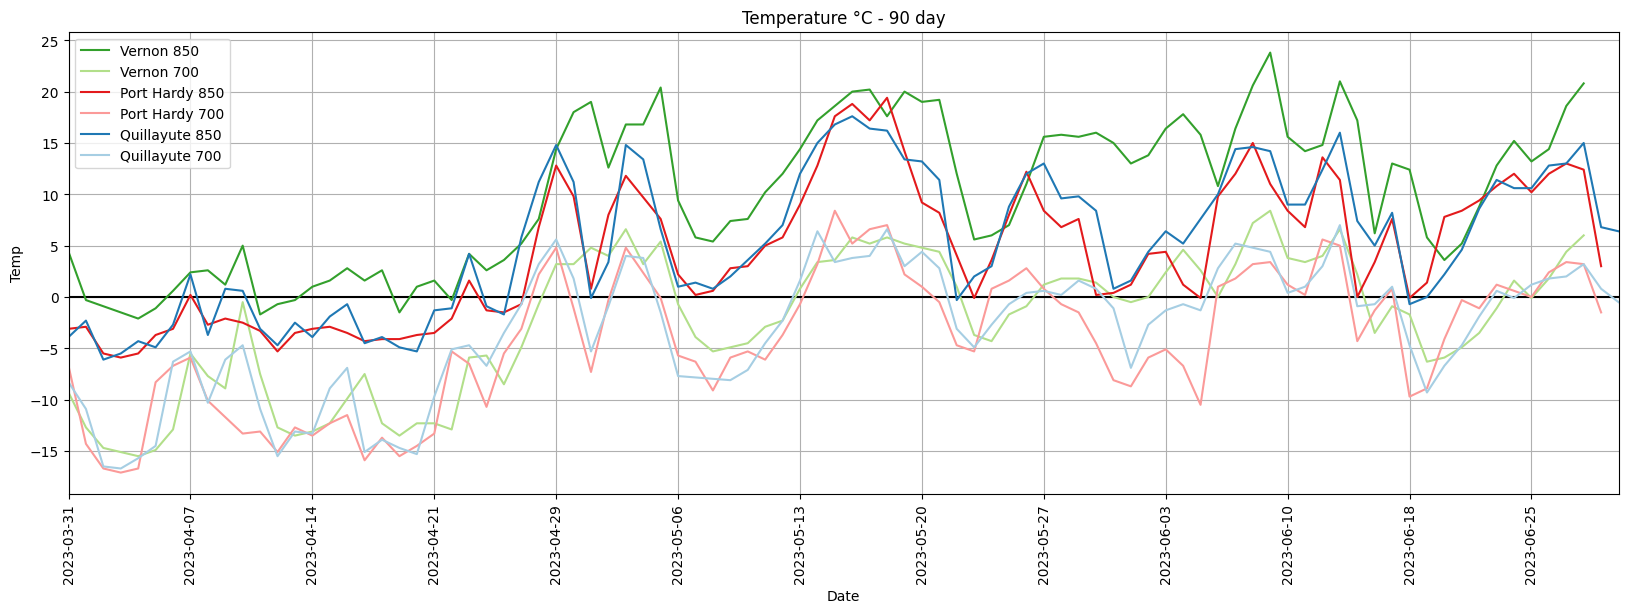

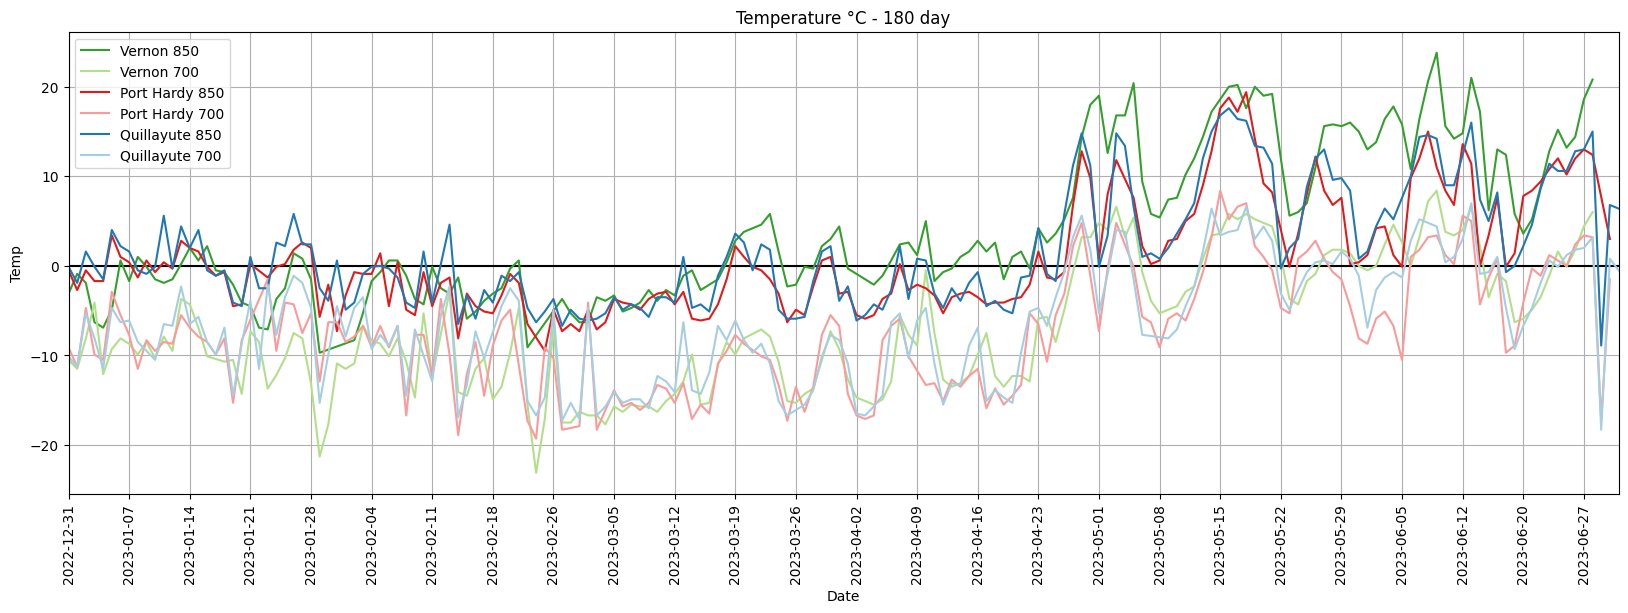

In [446]:
# Plot all temps on single graph
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plot_temps(plots, date, days, 'all')


## Plot Individual Temps
---
Plot a range of temp graphs for each location

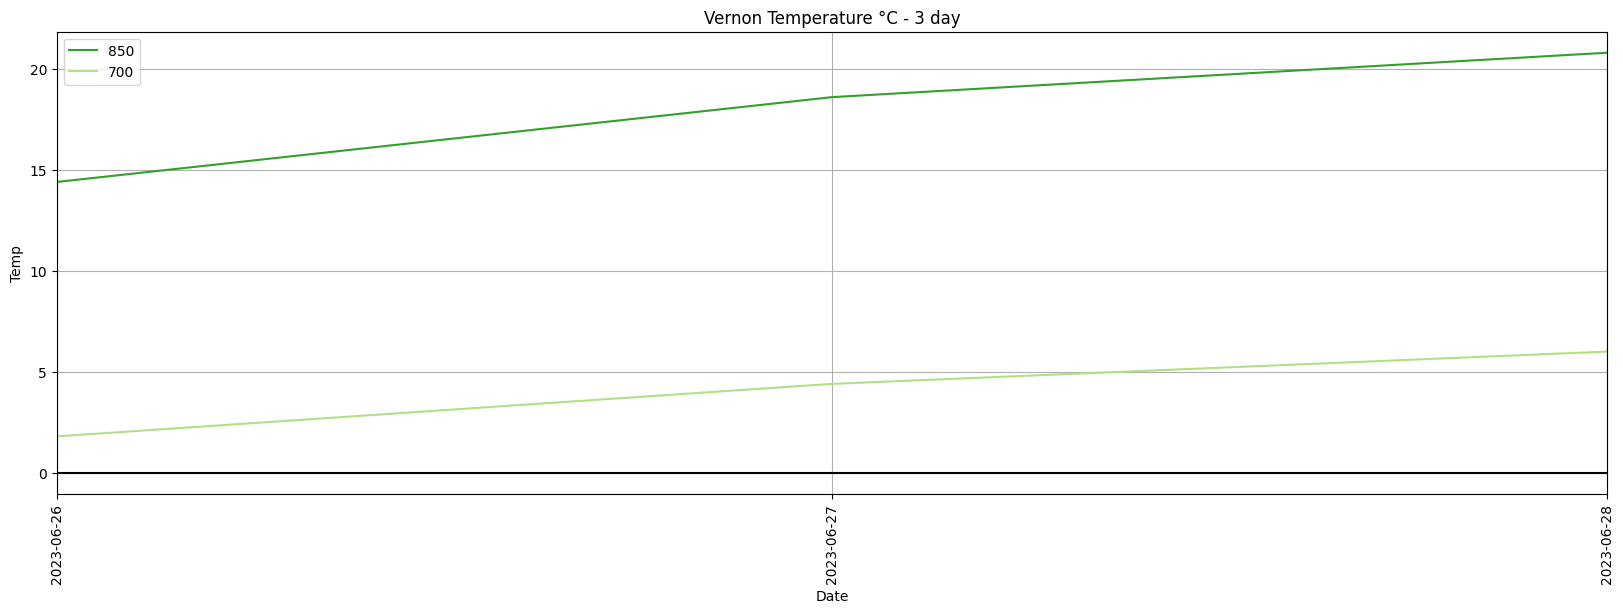

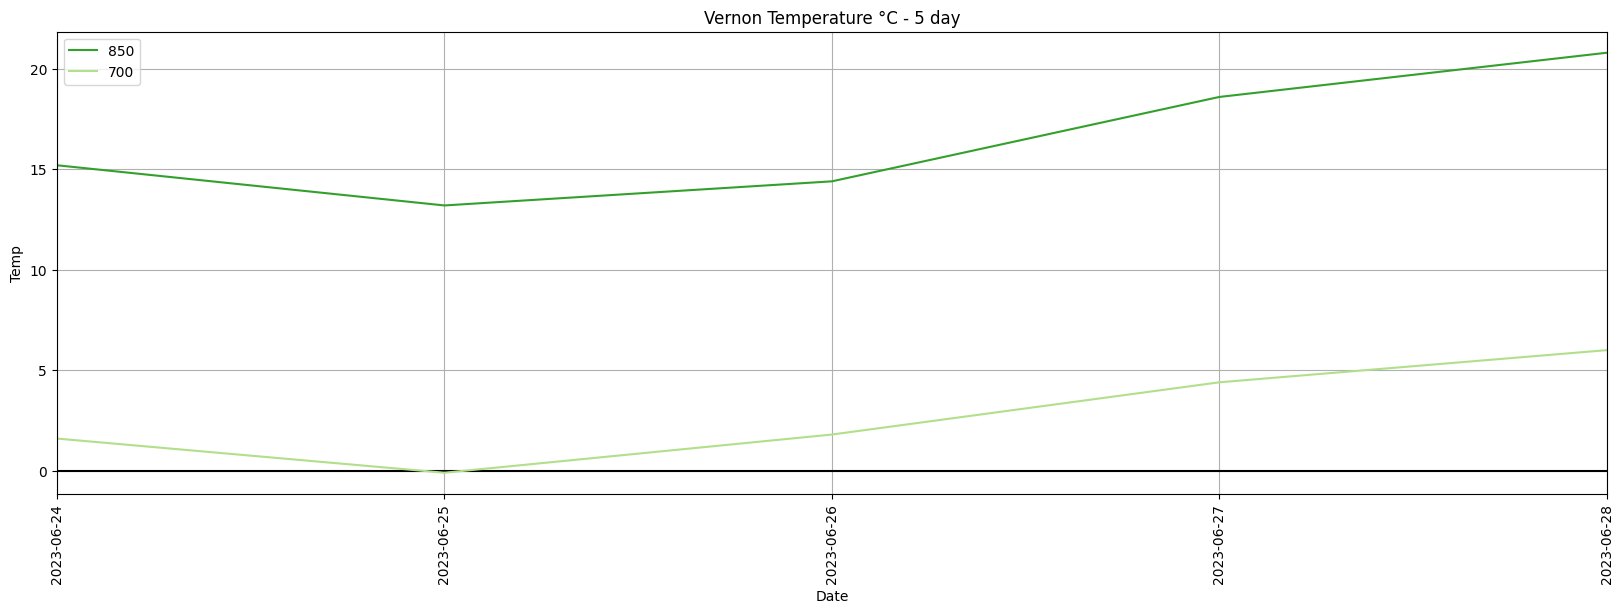

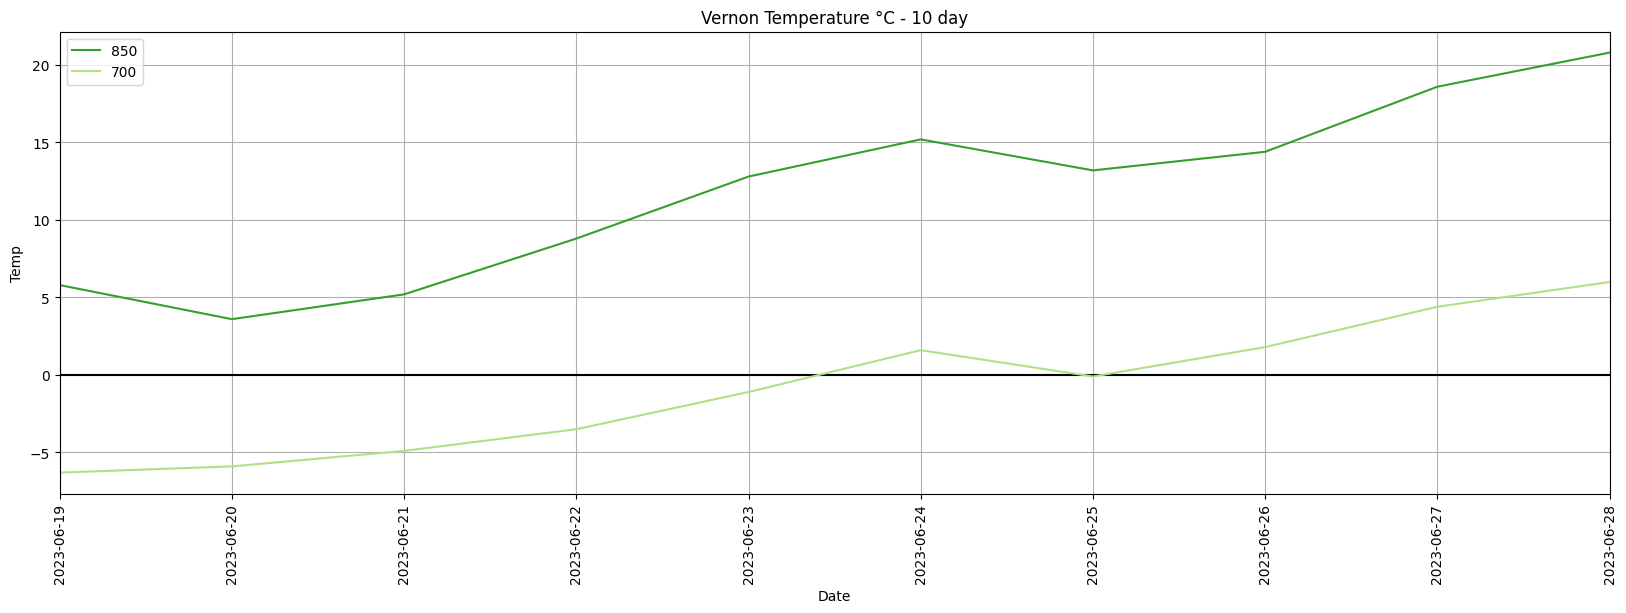

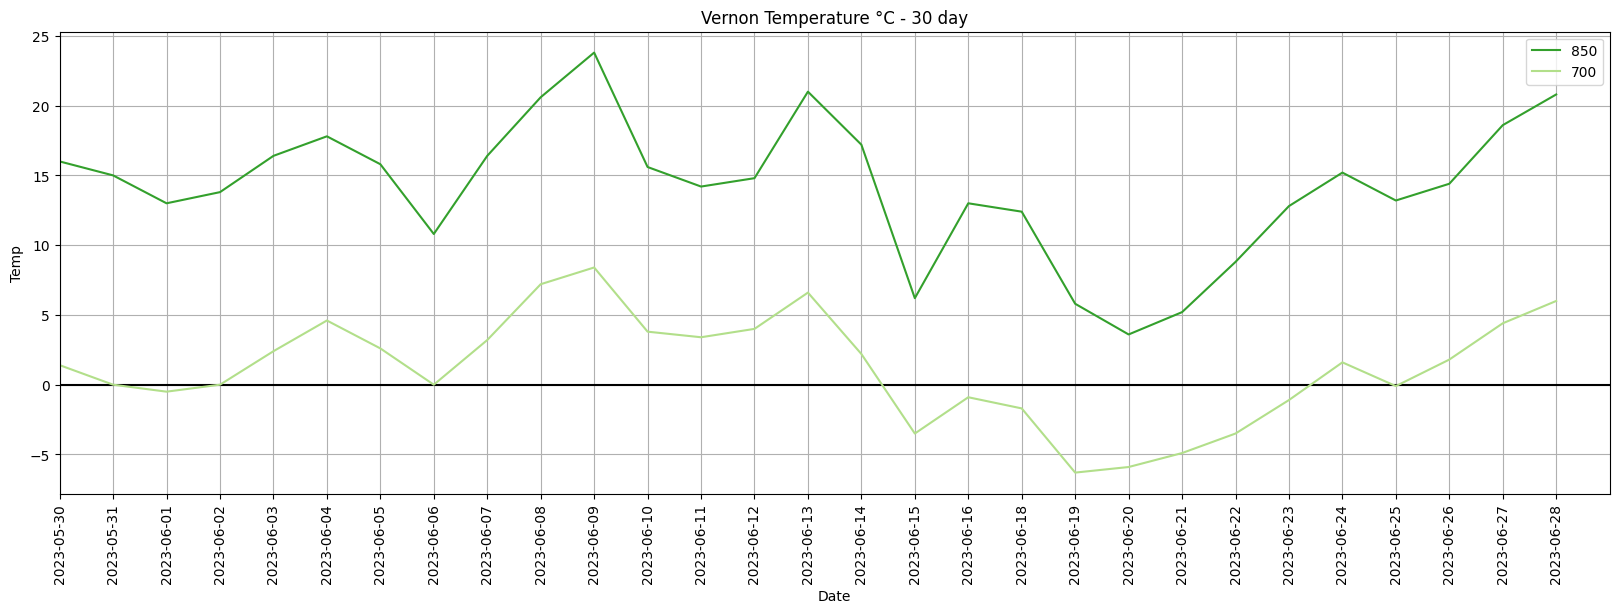

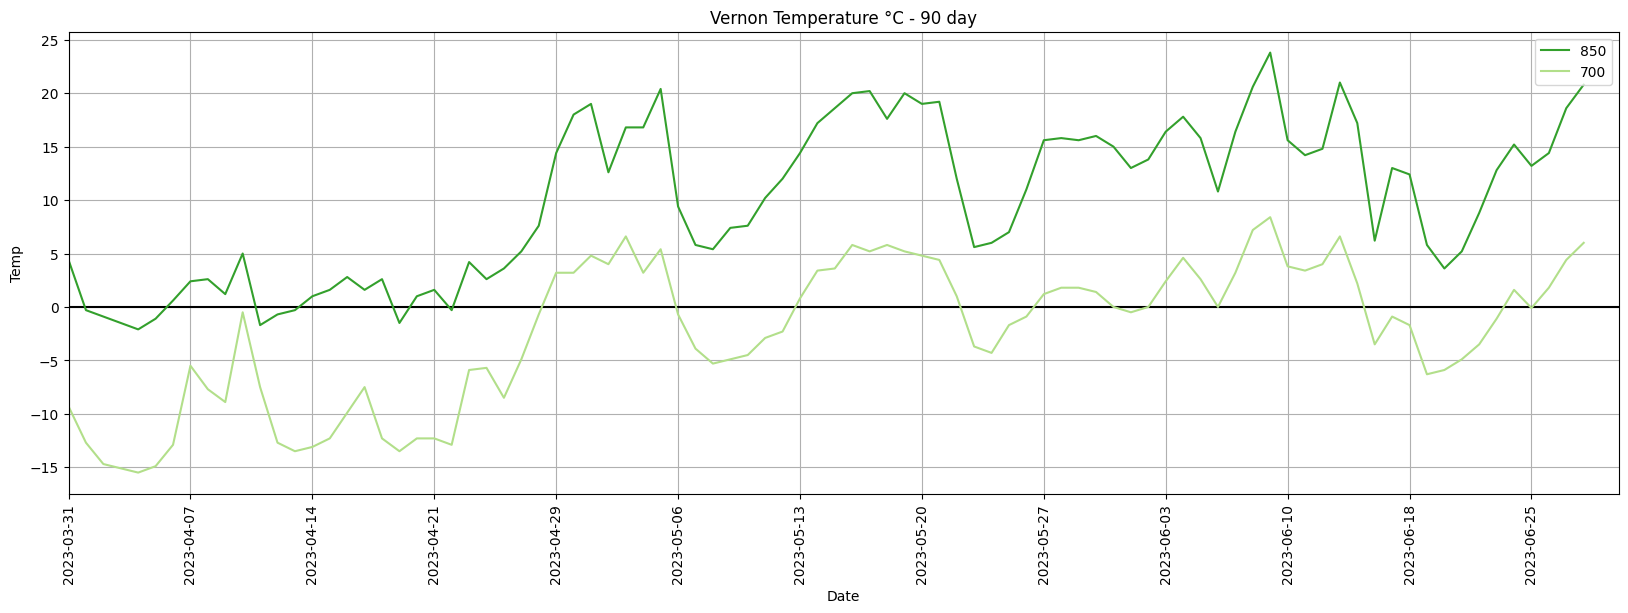

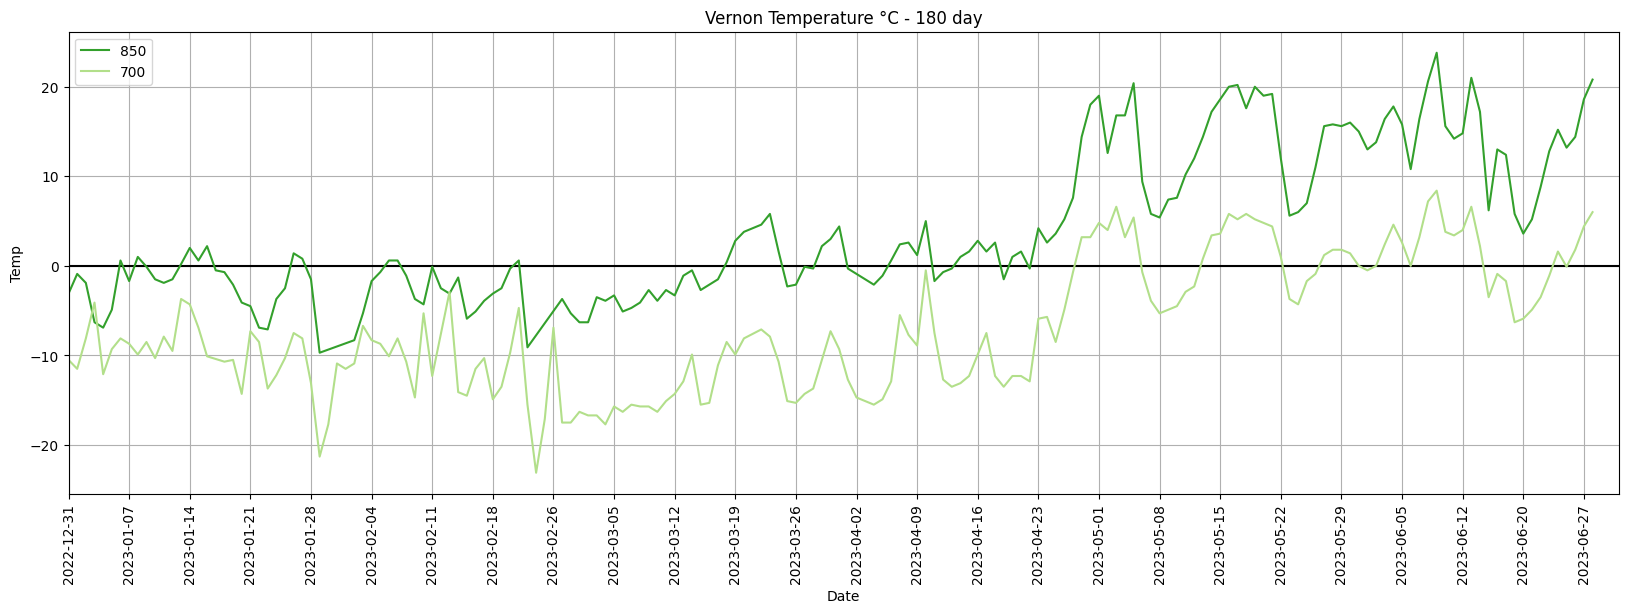

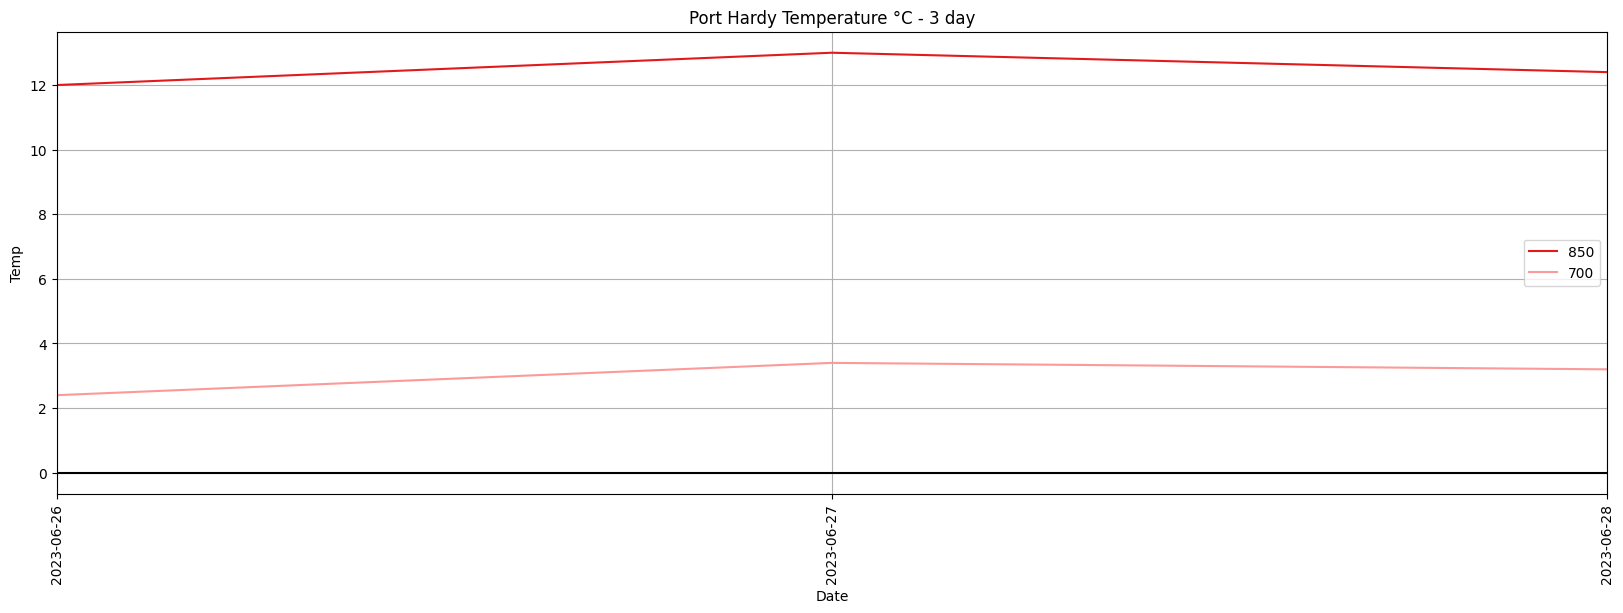

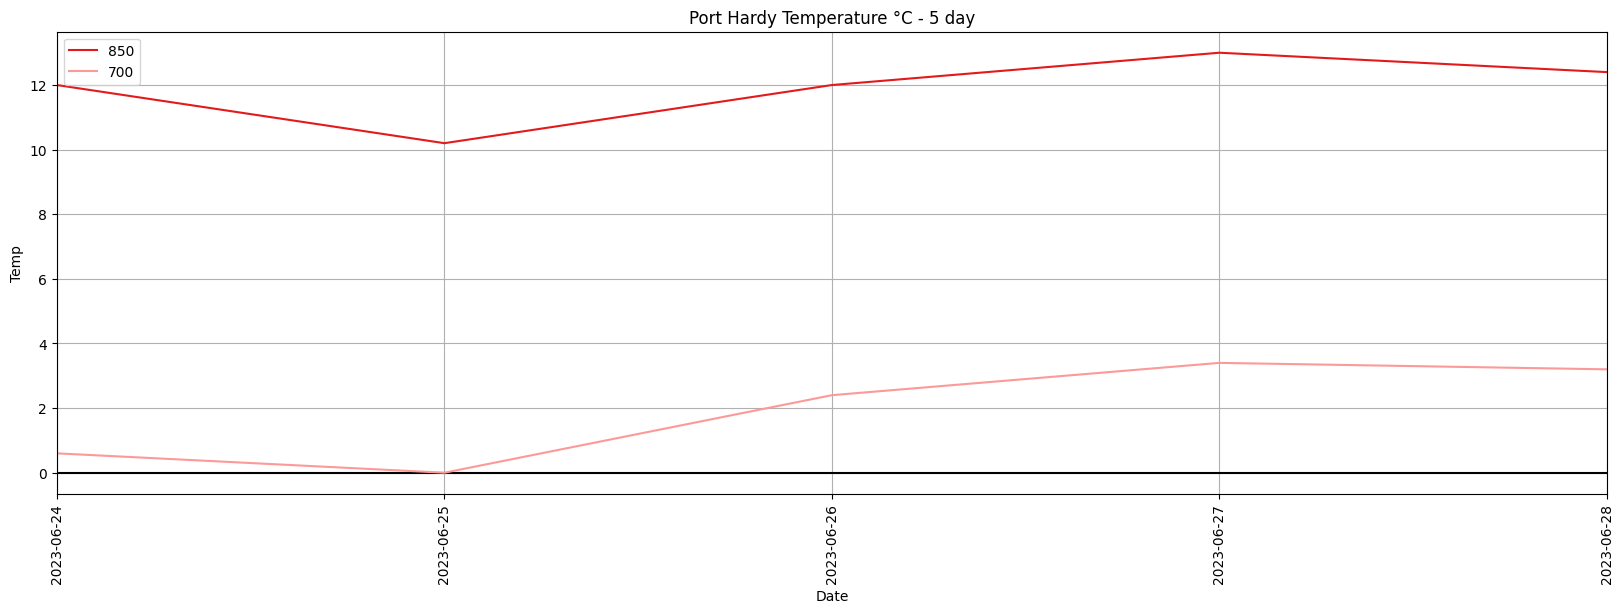

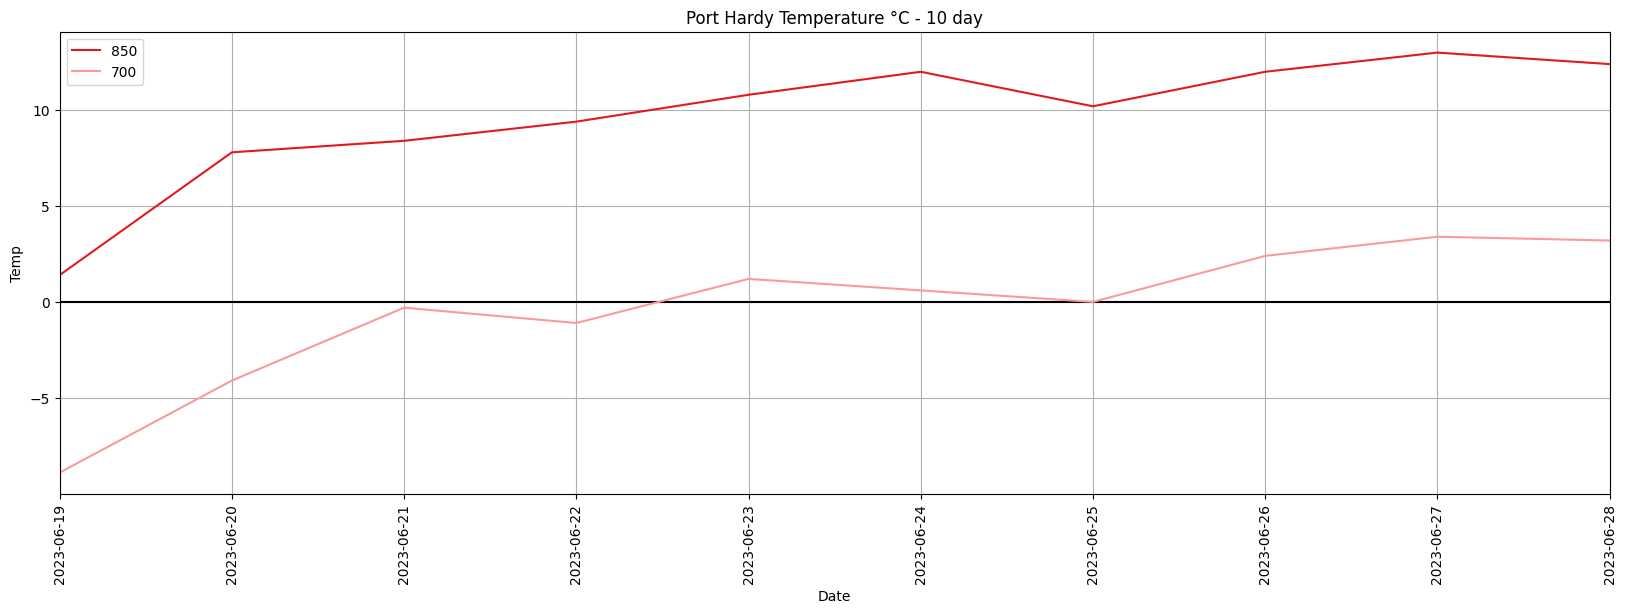

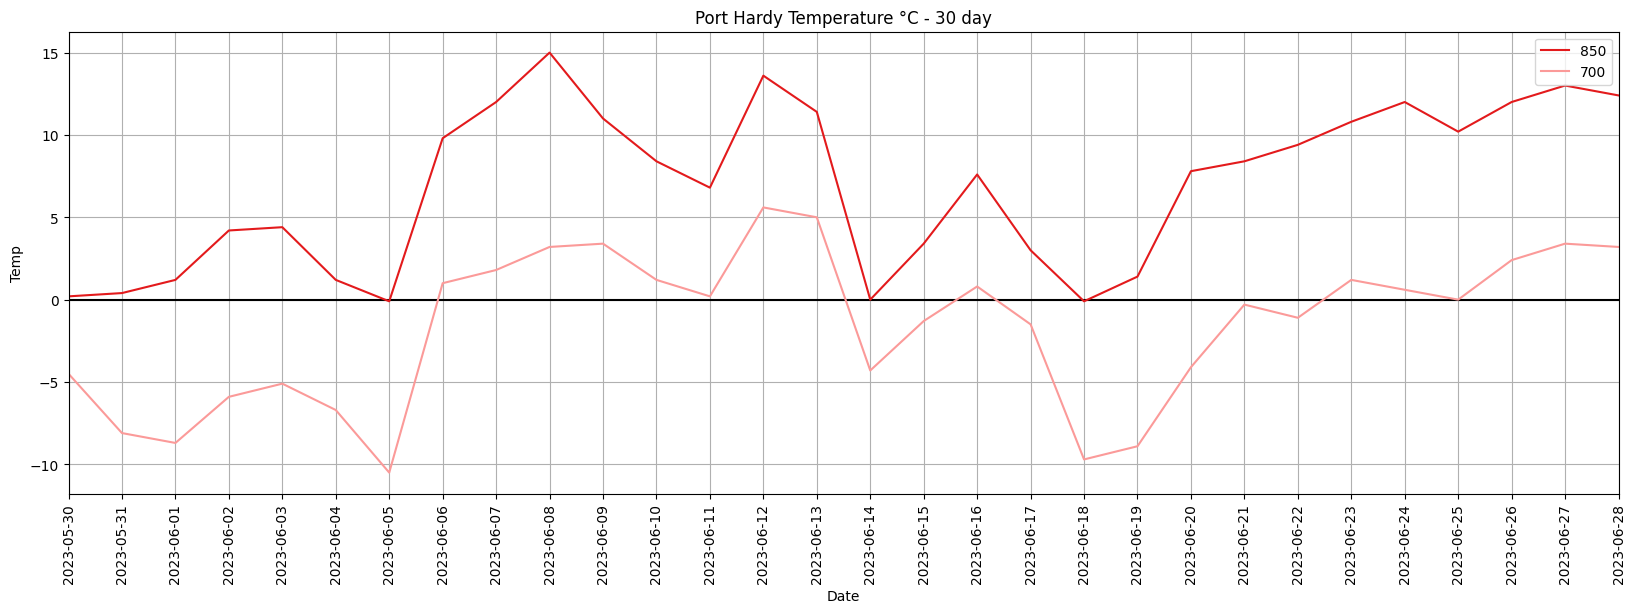

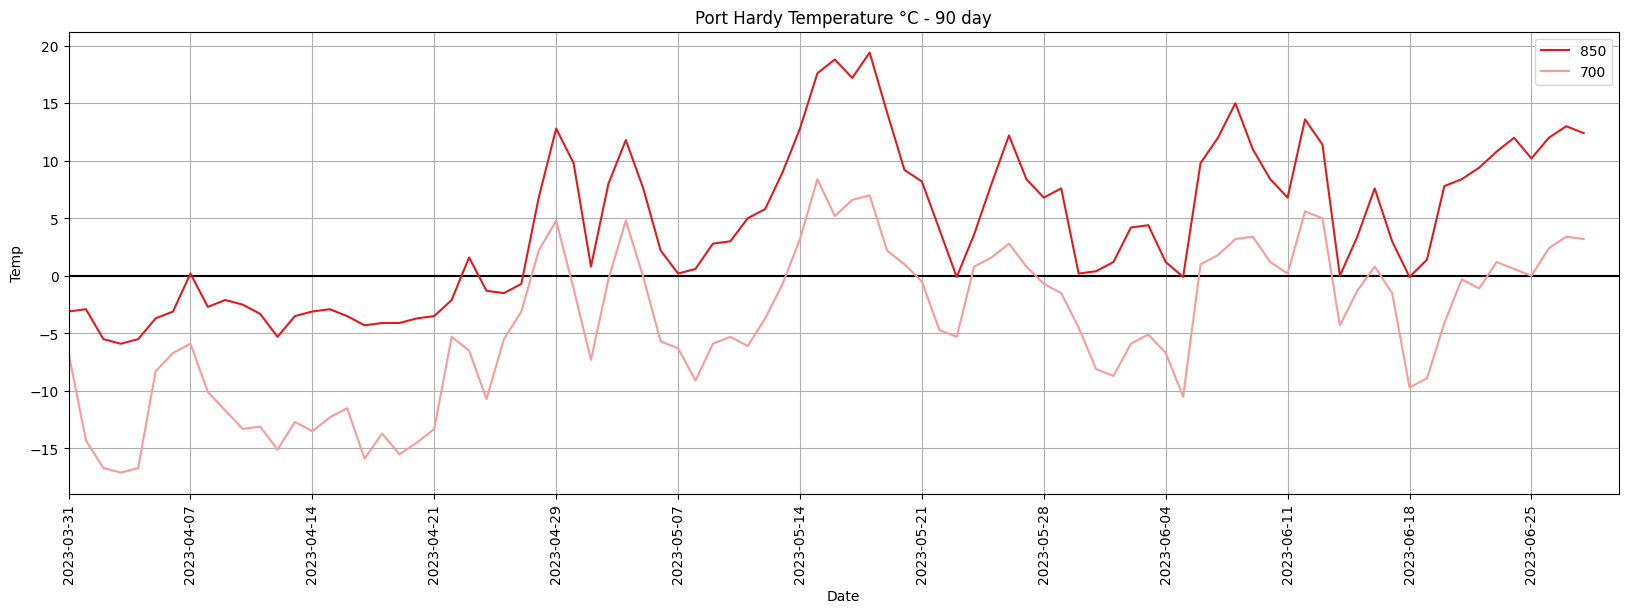

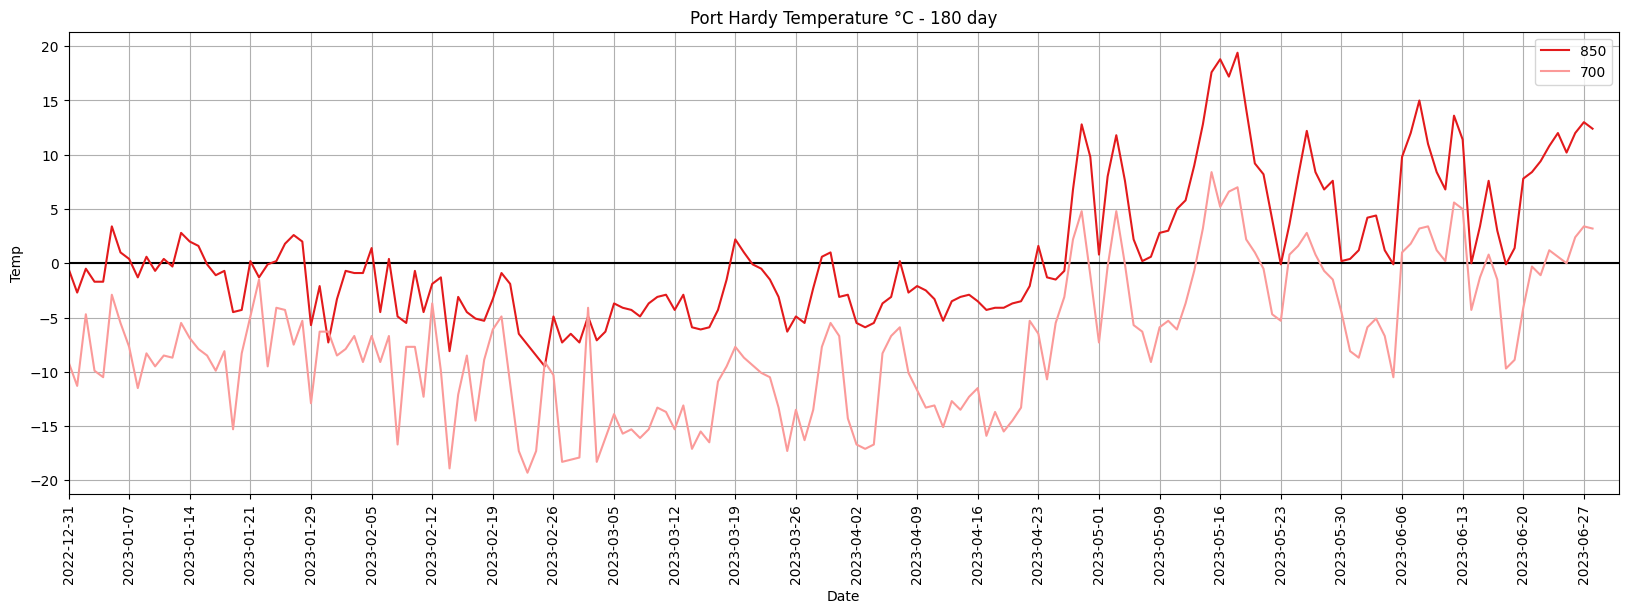

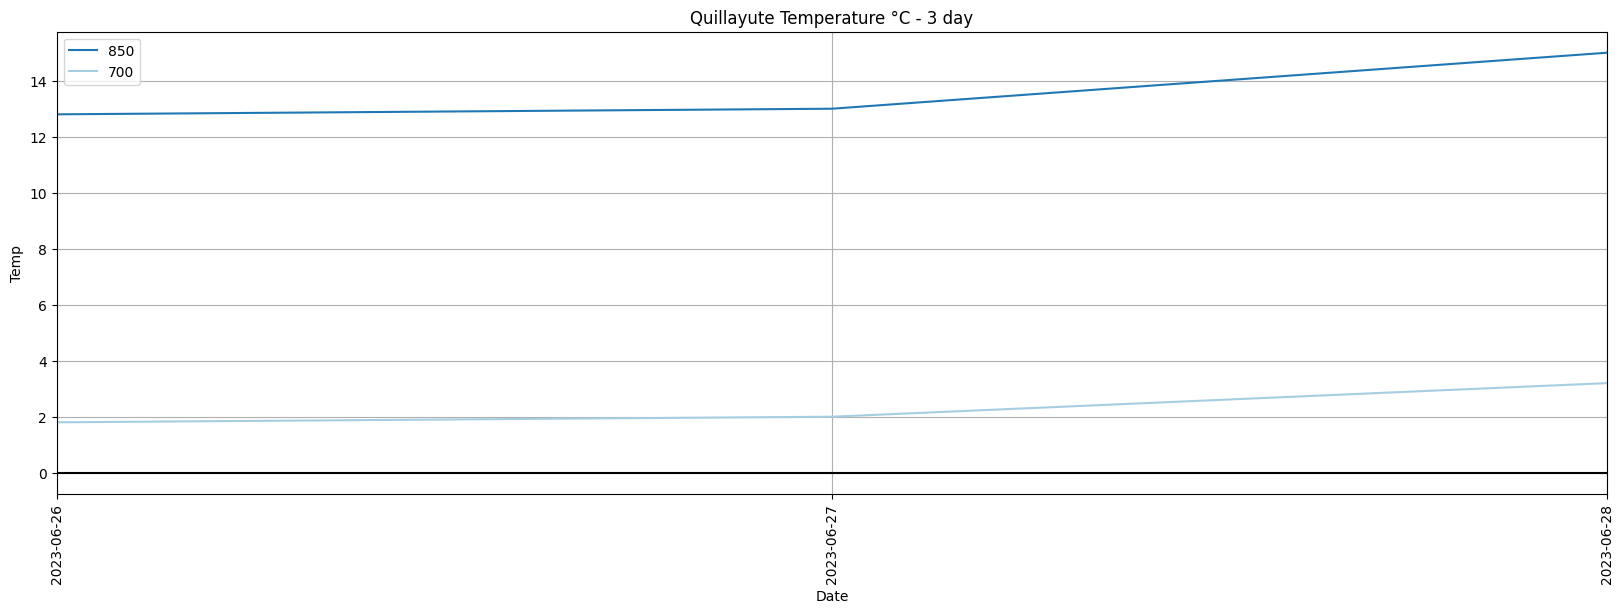

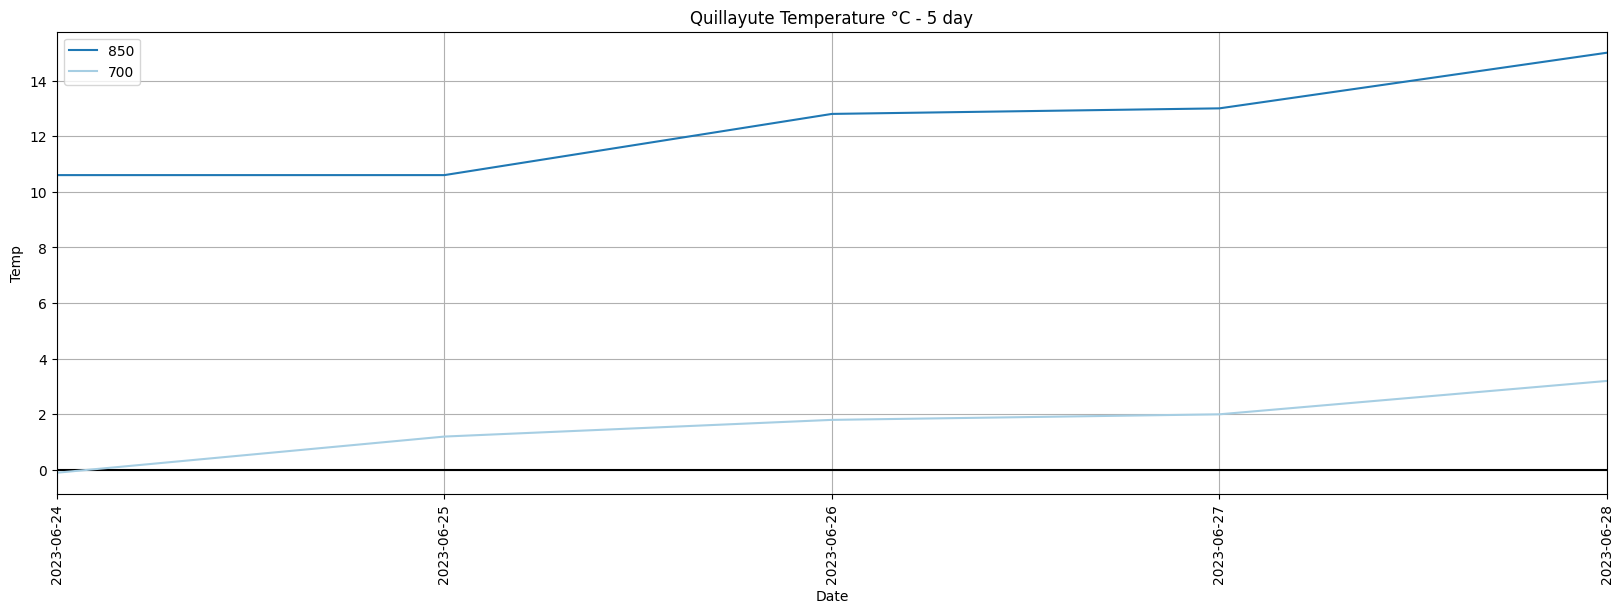

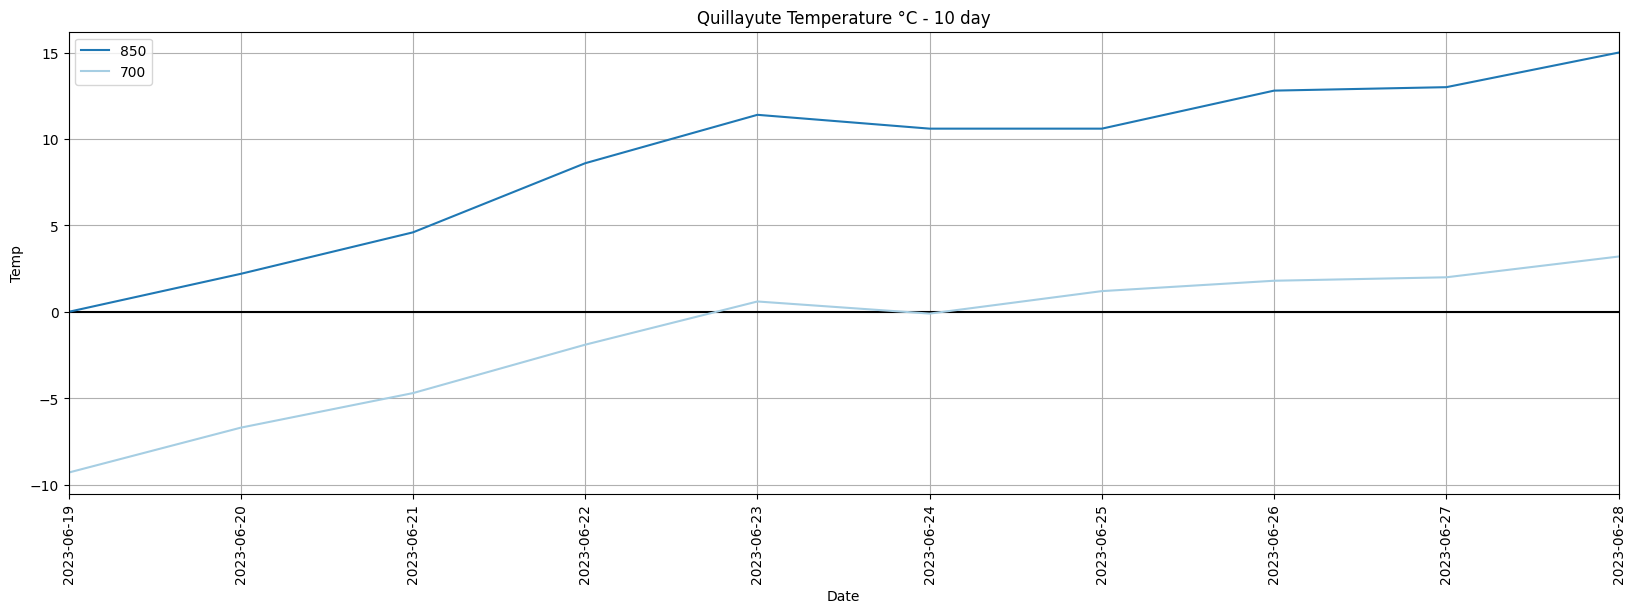

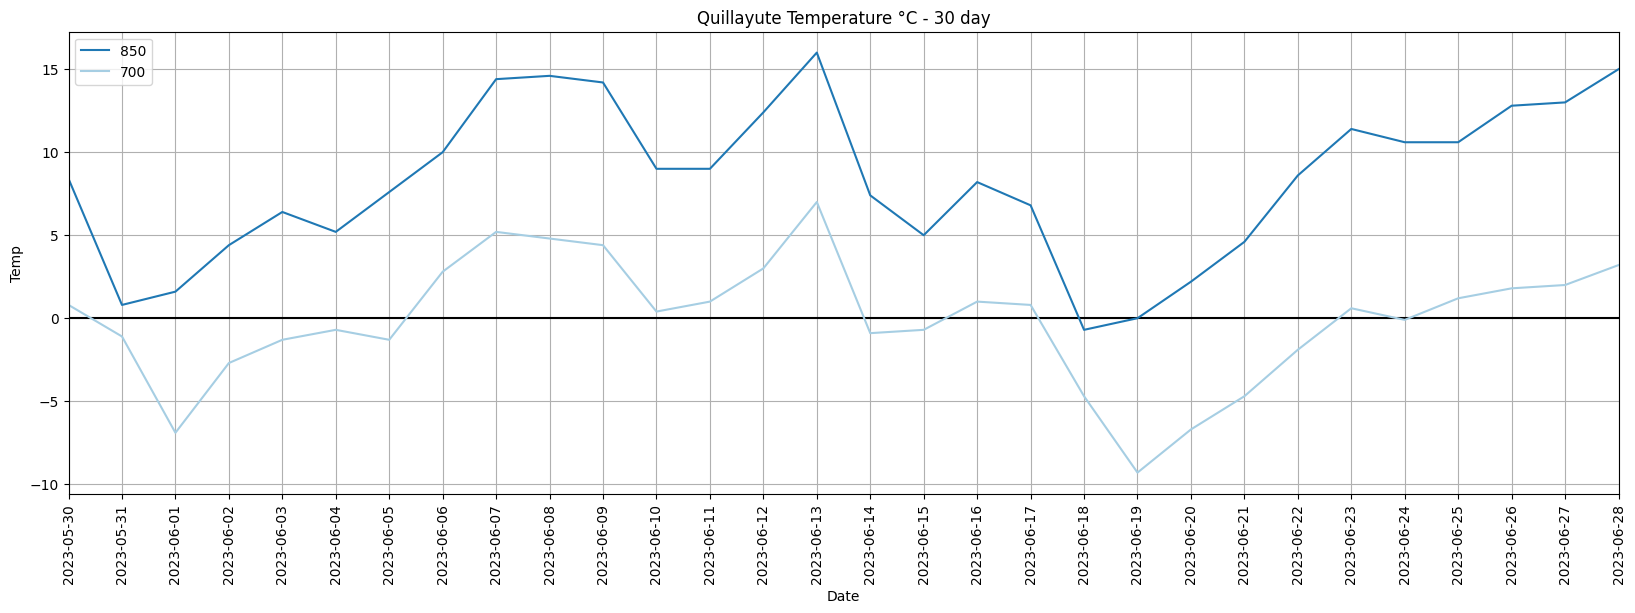

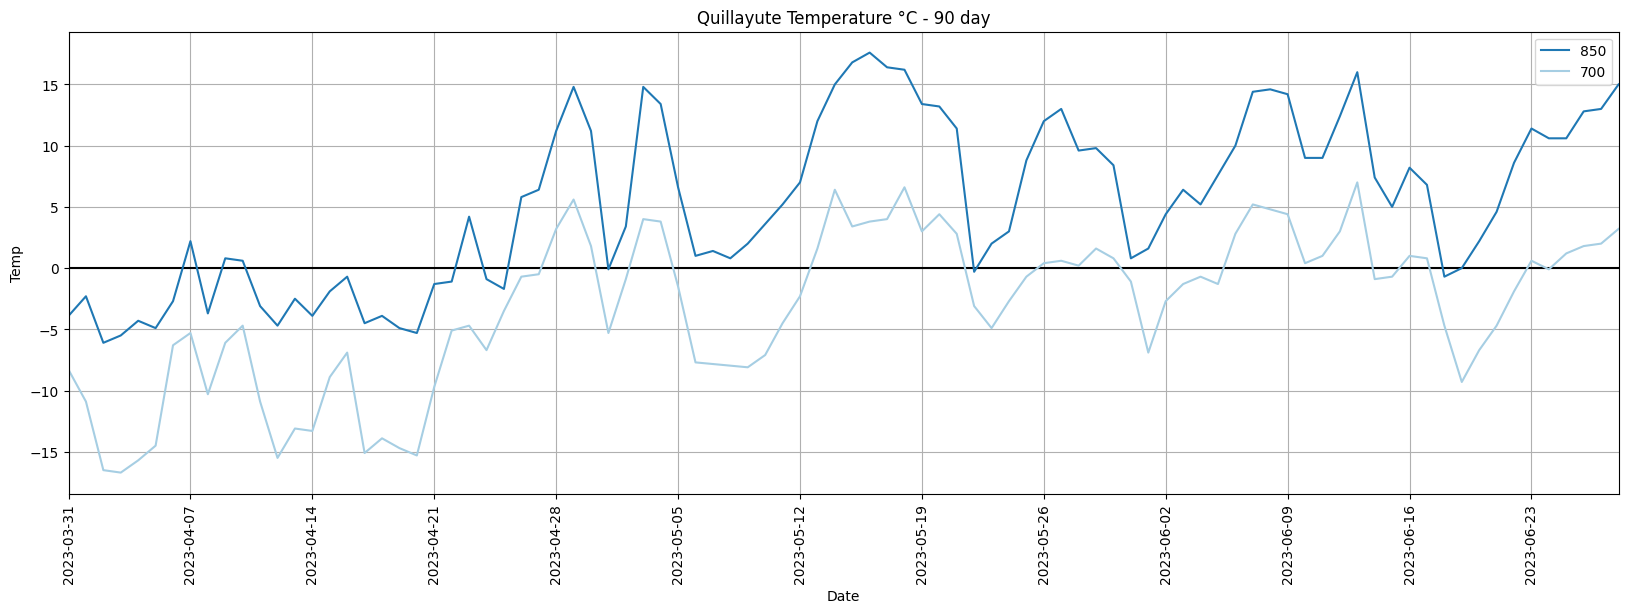

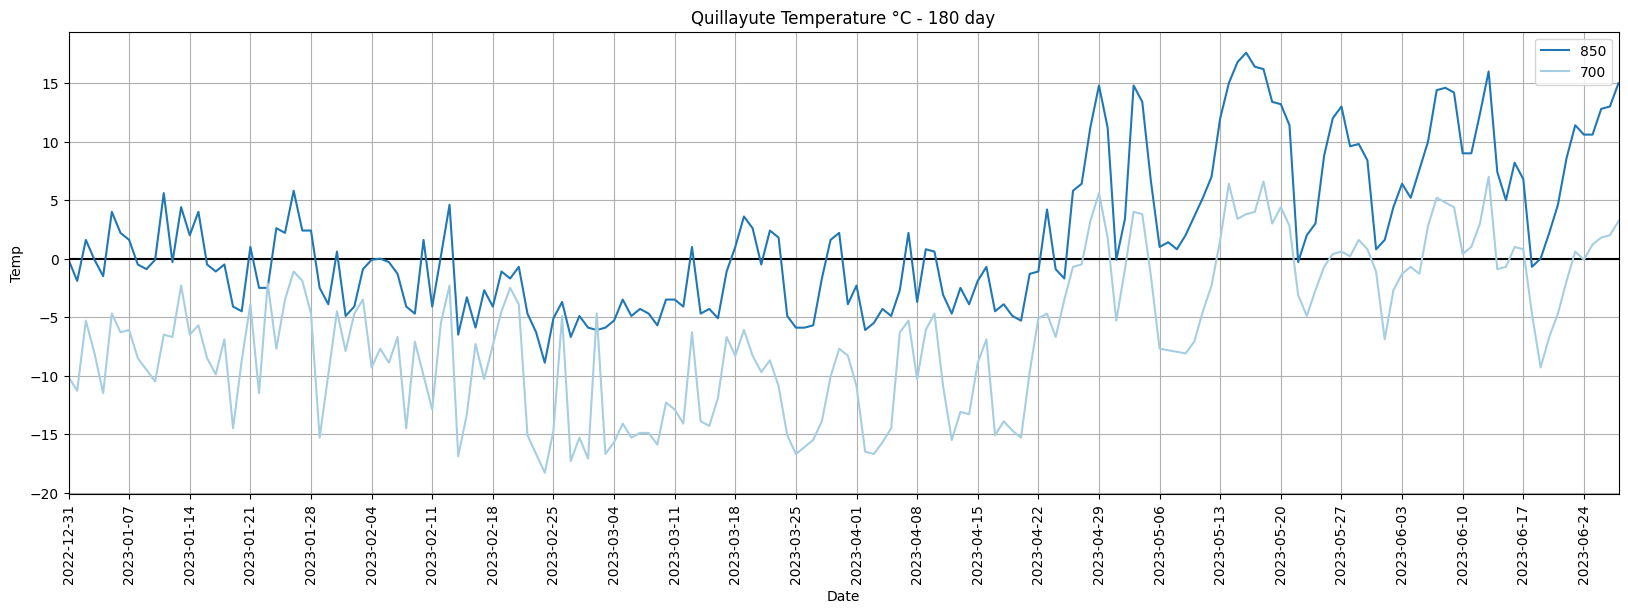

In [447]:
# Plot each temp on individual graph
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for plot in plots:
    plot_temps([plot], date, days)

## Plot Wind
---
Plot a range of wind graphs for each location

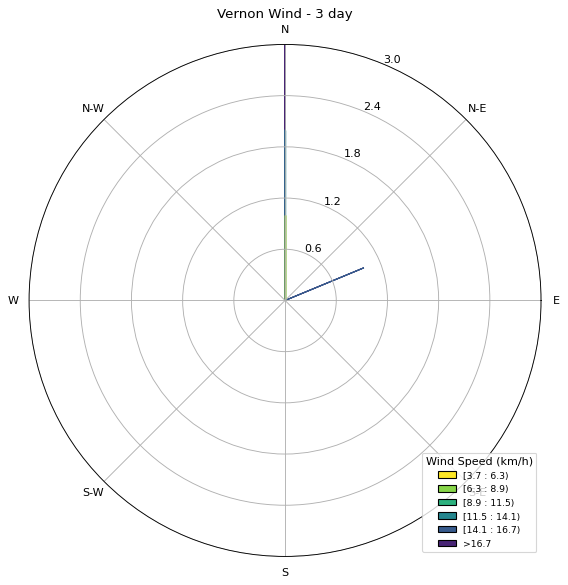

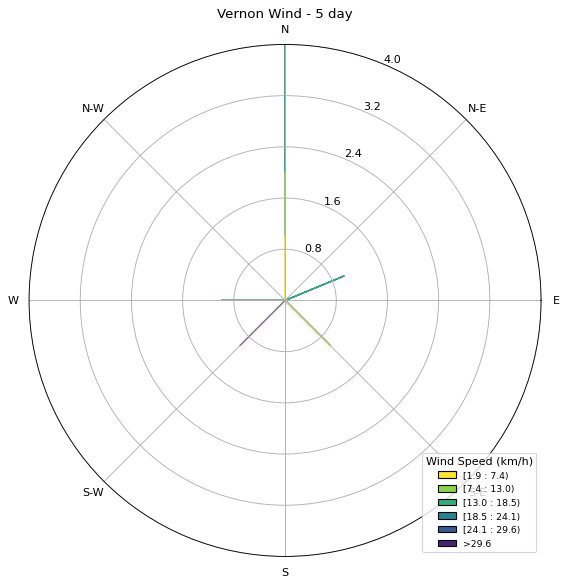

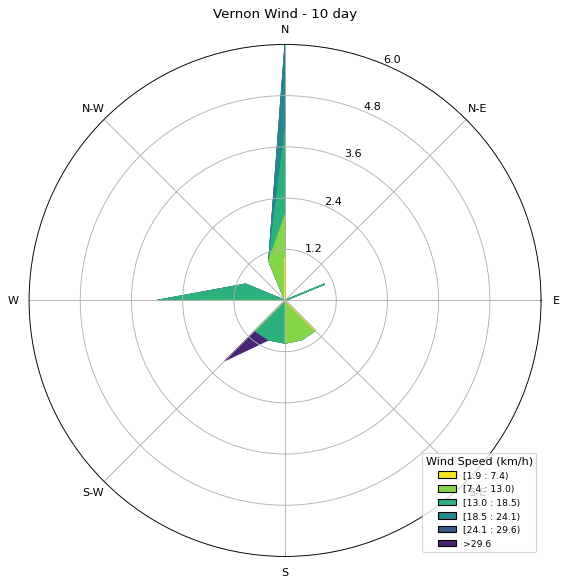

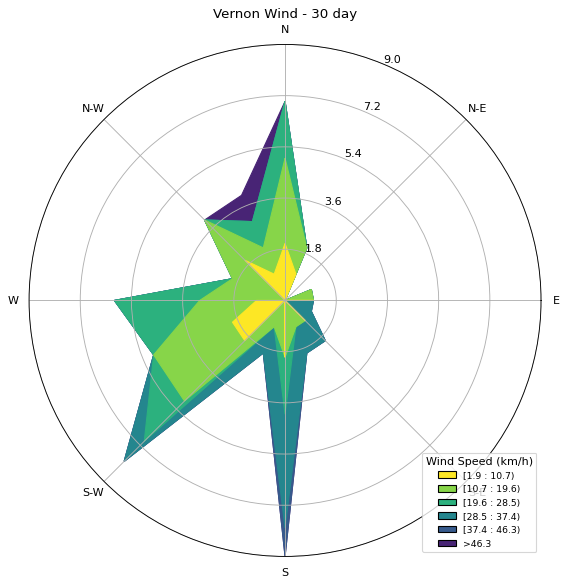

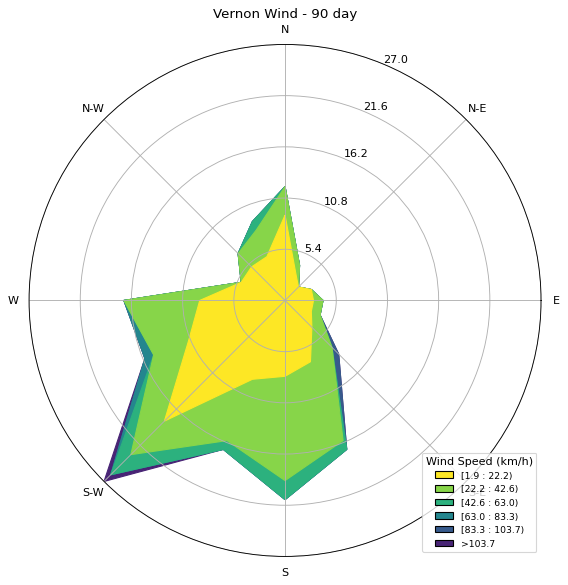

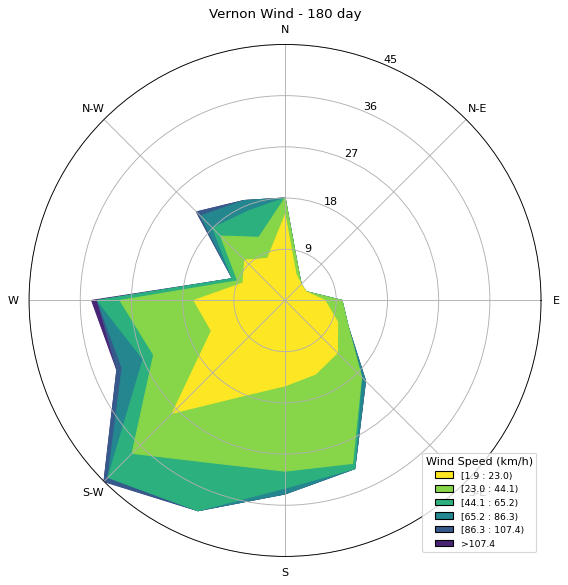

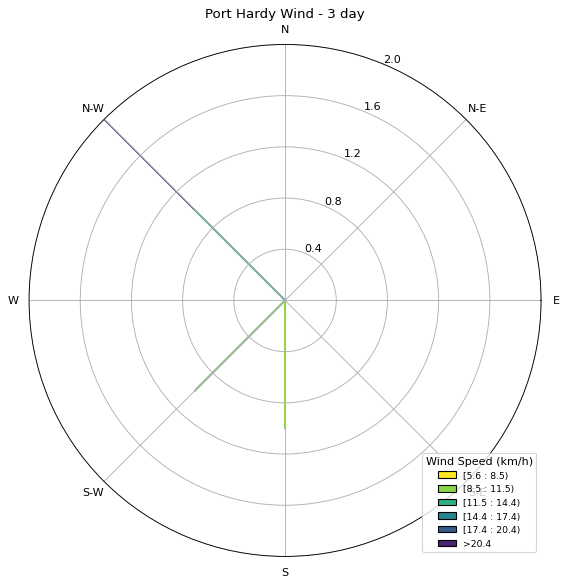

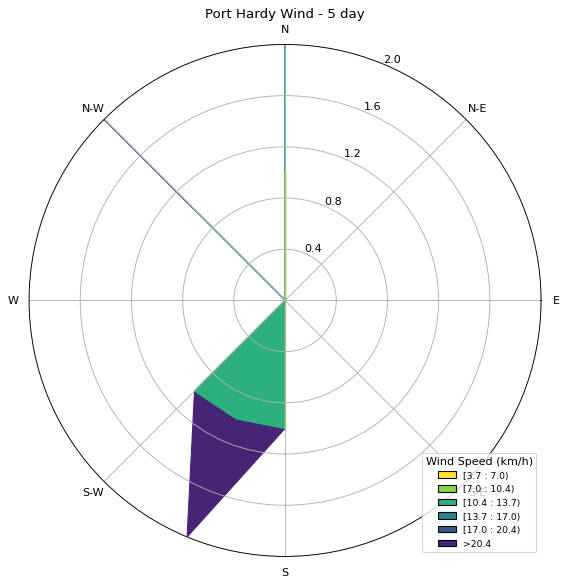

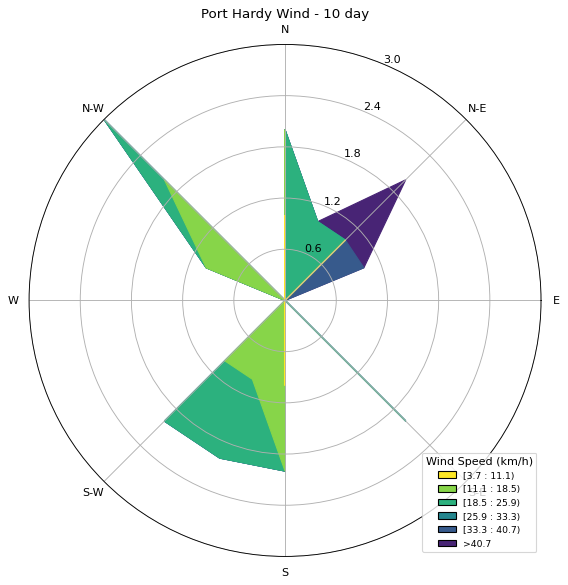

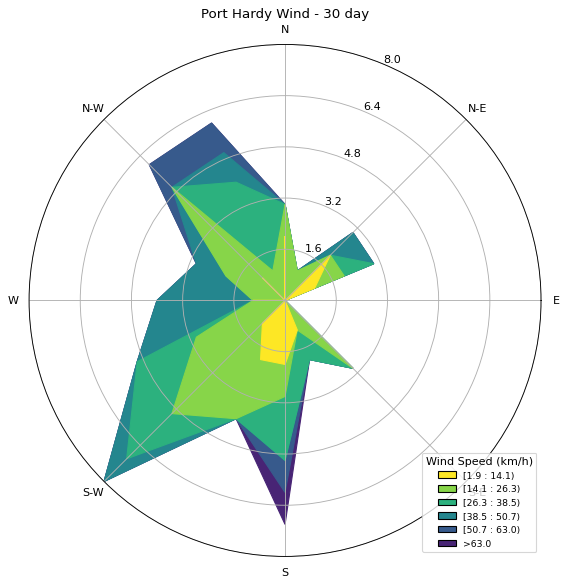

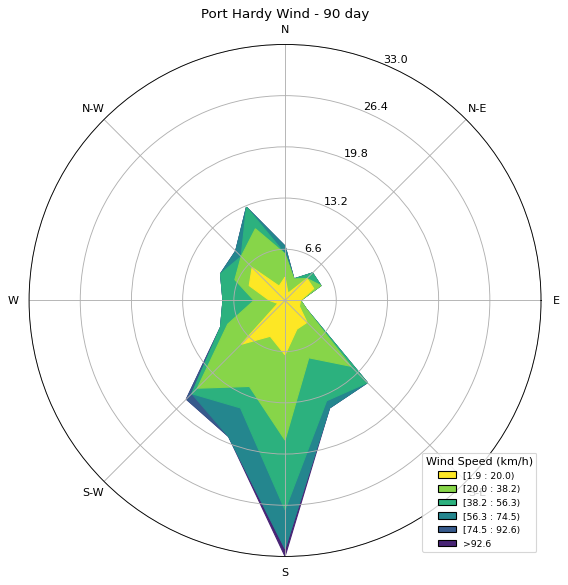

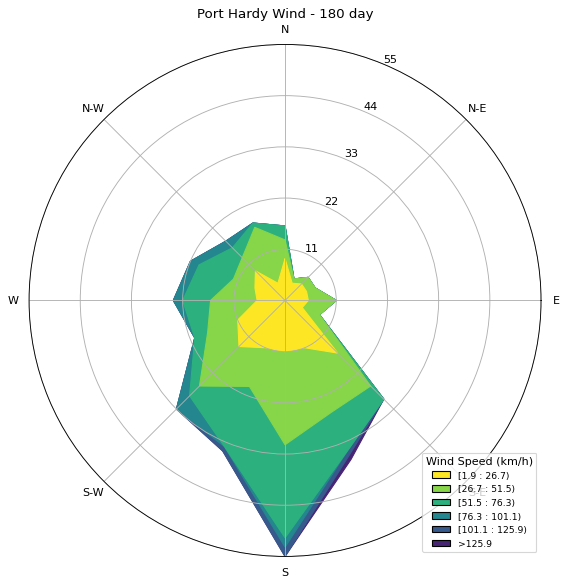

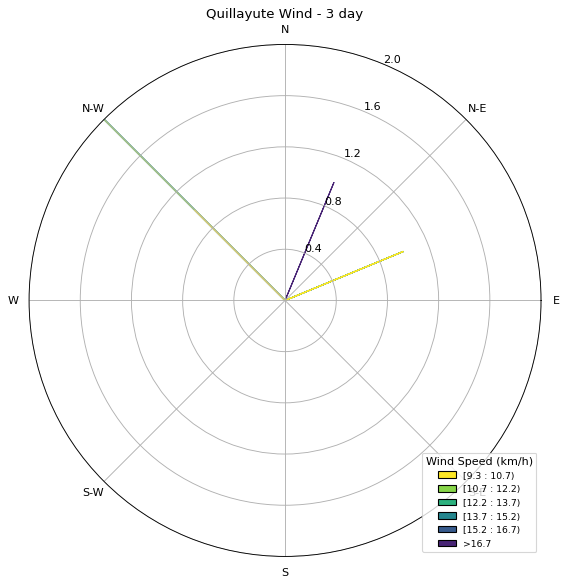

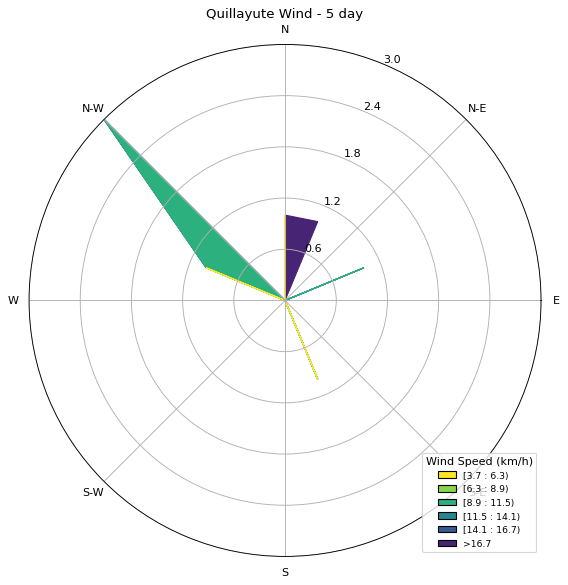

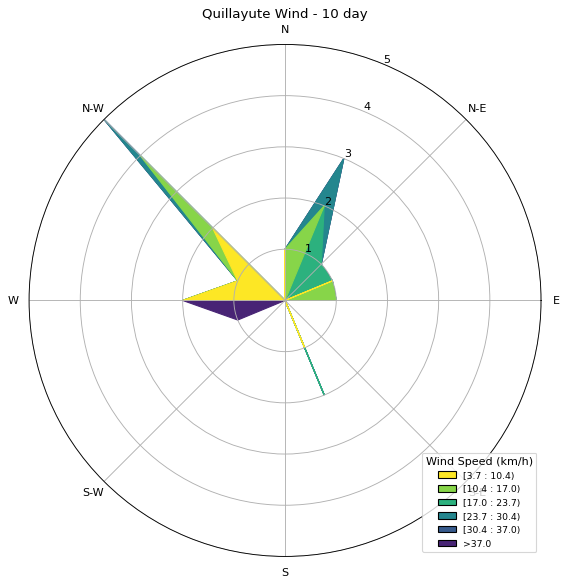

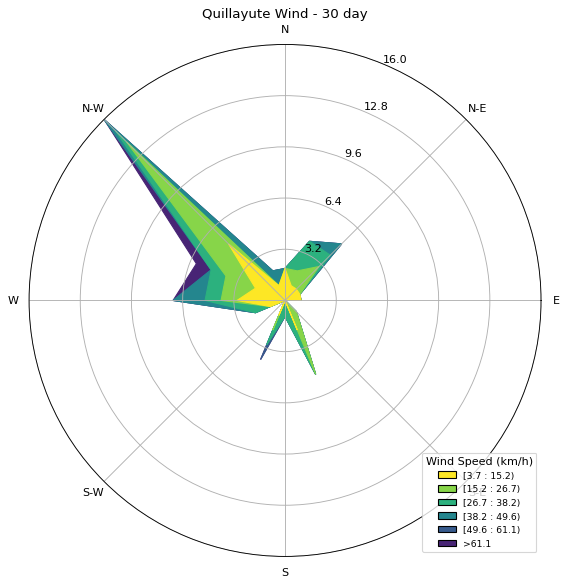

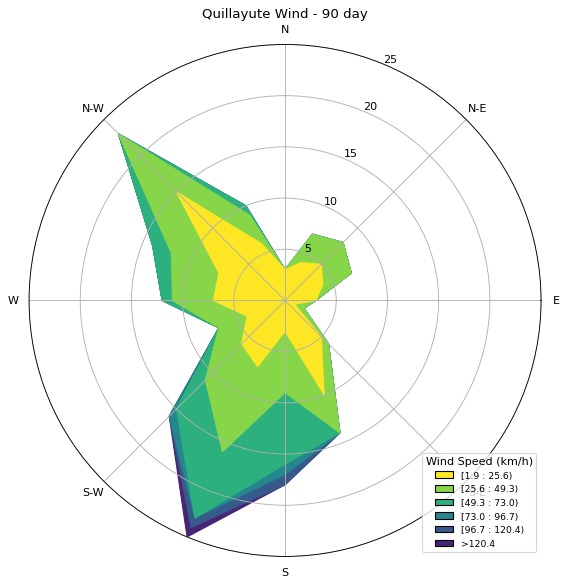

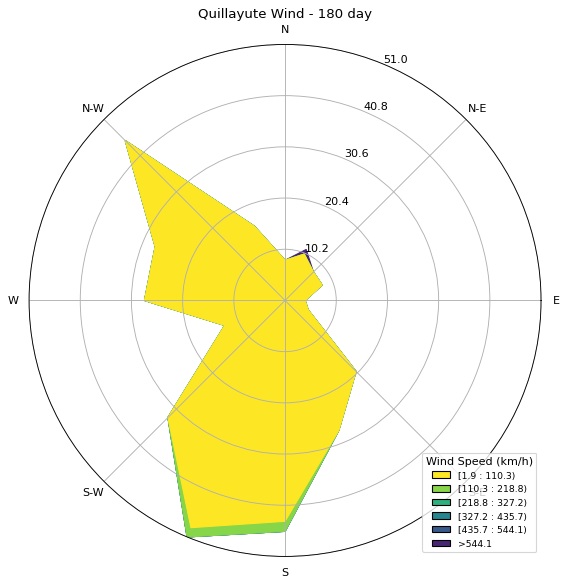

In [448]:
# Plot each wind on individual graph
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for plot in plots:
    plot_wind(plot, days=days)

## To Do...
---
What are we actually seeing with the windrose?
- is it simply distribution of wind direction
- is it showing how many instances of a particular wind speed we had

Time to connect this to the Google Storage Buckets
- Read csv from bucket
- Write graphs to bucket

In [ ]:
start_date = date(2020, 1, 1)
end_date = datetime.today().date()

# Create list of all dates between start_date and today
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def date_range(start, delta):
    dates = []
    delta = timedelta(days=1)
    
    while start <= end:
        # add current date to list by converting  it to iso format
        dates.append(start.isoformat())
        # increment start date by timedelta
        start += delta
        
    return dates